In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from fbprophet import Prophet
import numpy as np

### Problem Statement

Build the forecasting models to determine the demand of a particular product

__Dataset__: Data set contains the product demands for encoded products
<br>
Source: https://www.kaggle.com/felixzhao/productdemandforecasting

__References__: https://pythondata.com/forecasting-time-series-data-with-prophet-part-1/

## Data Extraction

In [3]:
demand = pd.read_csv('../data/external/Historical Product Demand.csv', low_memory=False)
list(demand)

['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand']

In [4]:
demand.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,7/27/12,100
1,Product_0979,Whse_J,Category_028,1/19/12,500
2,Product_0979,Whse_J,Category_028,2/3/12,500
3,Product_0979,Whse_J,Category_028,2/9/12,500
4,Product_0979,Whse_J,Category_028,3/2/12,500


In [33]:
# Check if there are any columns with null values
demand.isna().any()

Product_Code        False
Warehouse           False
Product_Category    False
Date                False
Order_Demand        False
dtype: bool

In [35]:
# Drop NAs
demand = demand.dropna(how='any',axis=0) 

In [7]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
Product_Code        1037336 non-null object
Warehouse           1037336 non-null object
Product_Category    1037336 non-null object
Date                1037336 non-null object
Order_Demand        1037336 non-null int64
dtypes: int64(1), object(4)
memory usage: 47.5+ MB


In [8]:
demand.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,7/27/12,100
1,Product_0979,Whse_J,Category_028,1/19/12,500
2,Product_0979,Whse_J,Category_028,2/3/12,500
3,Product_0979,Whse_J,Category_028,2/9/12,500
4,Product_0979,Whse_J,Category_028,3/2/12,500


In [9]:
demand.Product_Code.unique()

array(['Product_0993', 'Product_0979', 'Product_1159', ...,
       'Product_0237', 'Product_0644', 'Product_0853'], dtype=object)

In [10]:
## Which product has maximum demand?

In [11]:
demand.groupby("Product_Code").sum().sort_values("Order_Demand", ascending=False).head(5)

,Order_Demand
Product_Code,
Product_1359,470710000
Product_1248,288927000
Product_0083,210427000
Product_1341,169777000
Product_1295,121992000


In [12]:
## Which warehouse has maximum demand?

In [13]:
demand.groupby("Warehouse").sum().sort_values("Order_Demand", ascending=False).head(5)

,Order_Demand
Warehouse,
Whse_J,3344521718
Whse_S,1034227618
Whse_C,581845212
Whse_A,143257683


In [14]:
demand.groupby("Product_Category").sum().sort_values("Order_Demand", ascending=False).head(5)

,Order_Demand
Product_Category,
Category_019,4219806665
Category_006,401649668
Category_005,198361890
Category_007,127725843
Category_028,47276346


In [15]:
product = demand.loc[demand['Product_Code'] == 'Product_1359']

In [16]:
product['Date'].min(), product['Date'].max()

('1/10/12', '9/9/16')

In [17]:
product.head(5)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
276,Product_1359,Whse_J,Category_019,4/18/12,80000
282,Product_1359,Whse_J,Category_019,5/21/12,70000
289,Product_1359,Whse_J,Category_019,6/26/12,80000
292,Product_1359,Whse_J,Category_019,7/17/12,100000
296,Product_1359,Whse_J,Category_019,8/24/12,100000


In [18]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16936 entries, 276 to 1046518
Data columns (total 5 columns):
Product_Code        16936 non-null object
Warehouse           16936 non-null object
Product_Category    16936 non-null object
Date                16936 non-null object
Order_Demand        16936 non-null int64
dtypes: int64(1), object(4)
memory usage: 793.9+ KB


In [19]:
product = product.drop(columns=['Warehouse','Product_Category','Product_Code'])

In [20]:
product.head(5)

,Date,Order_Demand
276,4/18/12,80000
282,5/21/12,70000
289,6/26/12,80000
292,7/17/12,100000
296,8/24/12,100000


In [21]:
product.isnull().sum()

Date            0
Order_Demand    0
dtype: int64

In [22]:
productnew = product.copy()

In [23]:
productnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16936 entries, 276 to 1046518
Data columns (total 2 columns):
Date            16936 non-null object
Order_Demand    16936 non-null int64
dtypes: int64(1), object(1)
memory usage: 396.9+ KB


In [24]:
productnew.head()

,Date,Order_Demand
276,4/18/12,80000
282,5/21/12,70000
289,6/26/12,80000
292,7/17/12,100000
296,8/24/12,100000


In [25]:
productnew = productnew.rename(columns={'Date': 'ds', 'Order_Demand': 'y'})

In [26]:
productnew.head(5)

,ds,y
276,4/18/12,80000
282,5/21/12,70000
289,6/26/12,80000
292,7/17/12,100000
296,8/24/12,100000


In [27]:
warnings.filterwarnings('ignore')
model = Prophet() #instantiate Prophet
model.fit(productnew); #fit the model with your dataframe

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future_data = model.make_future_dataframe(periods=6, freq = 'm')

In [29]:
forecast_data = model.predict(future_data)

In [30]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
16937,2017-02-28,34197.799466,-55652.020767,125434.850241
16938,2017-03-31,28278.125806,-66075.888773,123156.487937
16939,2017-04-30,45199.421727,-37726.269766,133118.595627
16940,2017-05-31,29839.048923,-53830.276871,124415.123352
16941,2017-06-30,29377.670028,-59320.560683,120327.926719


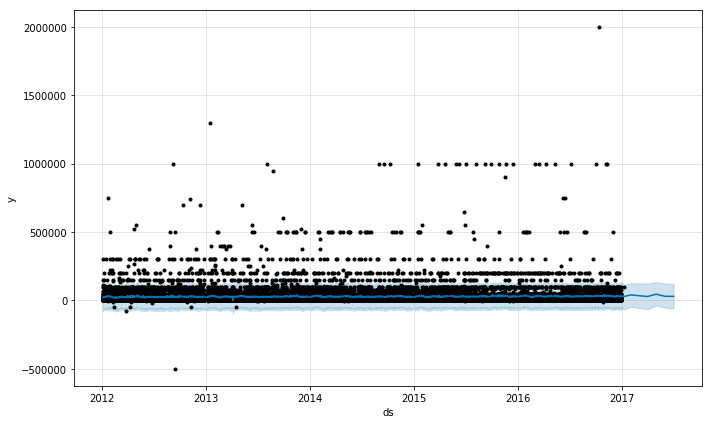

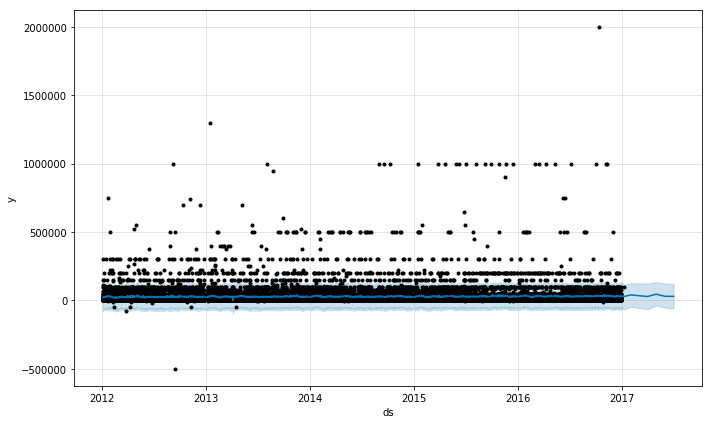

In [31]:
model.plot(forecast_data)

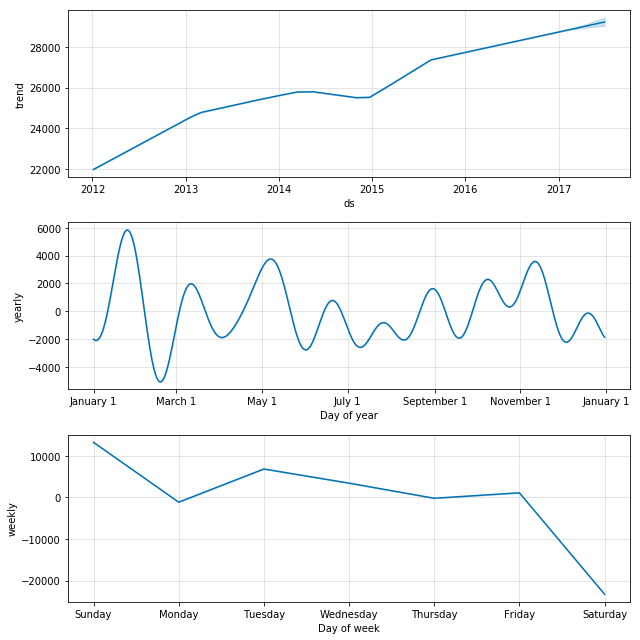

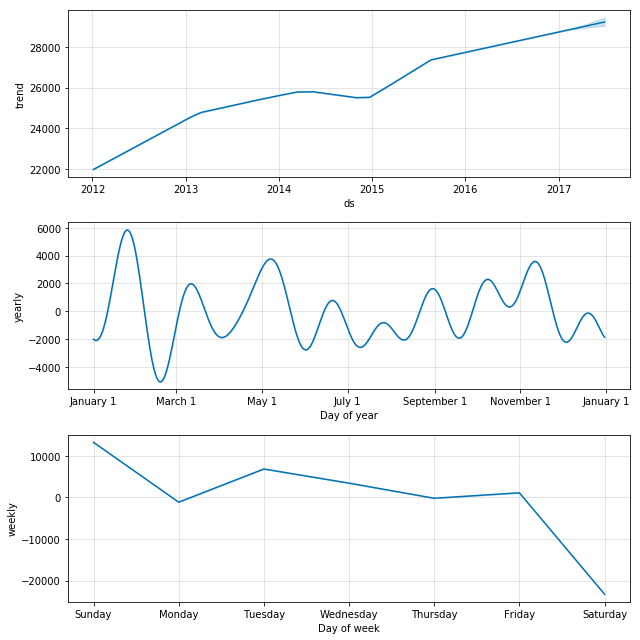

In [32]:
model.plot_components(forecast_data)